### This assignment has two parts.

### In Part-1, you will run Logistic Regression with different alpha values (Step 1.1), and explain what you see (Steps 1.2, 1.3, and 1.4).

### In Part-2, you will code up the get_minibatch_indices function (Steps 2.1, 2.2, and 2.3),  code up the mini_batch logic for Logistic Regression (Steps 2.5, 2.6, and 2.7), run the code with different mini-batch sizes (Step 2.4), and explain what you see (Steps 2.8 and 2.9).

### First, just read the entire Jupyter file to understand the flow of the code. Then, locate the Steps you need to address for each Part. Then, attempt Part-1. Then, attempt Part-2.

In [1]:
### DO NOT EDIT THIS CELL!!!
### DO NOT IMPORT ANY ADDITIONAL PACKAGES

import numpy as np
import scipy
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

### PART 1

* In this part, you will run Logistic Regression with different alpha values (Step 1.1), and explain what you see (Steps 1.2, 1.3, and 1.4).

* We aren't going to preprocess data or split into train/test since the focus here is purely on the gradient descent algorithm

* NOTE: YOU WILL ONLY EDIT 2 CELLS FOR PART-1 (SEE BELOW)

In [2]:
### DO NOT EDIT THIS CELL!!!

# read the breast cancer dataset from sklearn
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

# feature matrix X: mxn
X = dataset.data
print ("X: ", X.shape)

# target vector y: mx1
y = dataset.target
y = y.reshape(y.shape[0], 1)
print ("y: ", y.shape)

# number of samples: m
m = X.shape[0]
print ("m: ", m)

# number of features: n
n = X.shape[1]
features = dataset.feature_names
print ("n: ",n)
print ("features: ", features)

X:  (569, 30)
y:  (569, 1)
m:  569
n:  30
features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


num_epochs: 150
alpha: 2.5e-05
Final Loss at end of Training: 0.79
Training Set Accuracy: 0.66


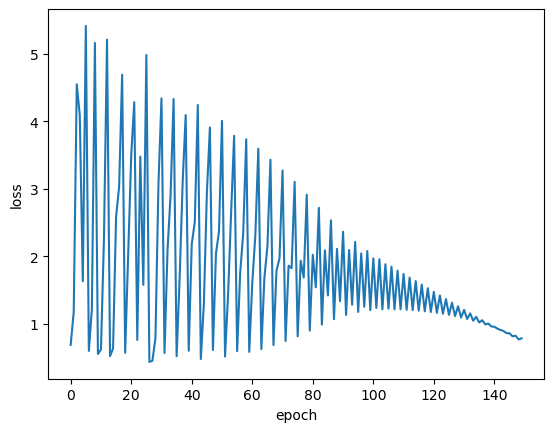

In [32]:
### THIS IS CELL 1 of 2 THAT YOU WILL EDIT FOR PART-1 AS INSTRUCTED BELOW

# initializae hyperparameters num_epochs, alpha
num_epochs = 150
print("num_epochs:", num_epochs)

### Step 1.1: 
# You will  execute this cell three times - each time with a different value of alpha below.
# For each run, note the following:
#  - num_epochs,
#  - alpha, 
#  - Final Loss at end of Training, 
#  - Training Set Accuracy,
#  - Nature of Loss vs Epoch curve
# Then, answer the questions in the next cell for each scenario run (Steps 1.2, 1.3 and 1.4).
alpha = 2.5e-5 # Scenario 1
# alpha = 2.5e-6 # Scenario 2
# alpha = 2.5e-5 # Scenario 3
print("alpha:", alpha)

# initialize model parameters w and b
w = np.zeros((n,1))
b = 0

# this list will collect loss for each epoch
costs = []

# repeat for num_epochs
for i in range(num_epochs):
        
    # forward pass (calculate current loss)
    z = X@w + b
    yhat = scipy.special.expit(z)
    J = metrics.log_loss (y, yhat, labels=[0,1])
    
    # backward propagation (calculate current gradient)
    dJ_dw = (1/m)*X.T@(yhat - y)
    dJ_db = (1/m)*np.sum((yhat-y),axis=0,keepdims=True)
    
    # gradient descent step (update parameters)
    w = w - alpha*dJ_dw
    b = b - alpha*dJ_db
    
    # append loss to costs
    costs.append(J)

print("Final Loss at end of Training:", round(J, 2))

# use final parameters w and b to calculate accuracy for training data X, y
z = X @ w + b
yhat = scipy.special.expit(z)
yhat = np.round(yhat) 
score = metrics.accuracy_score(y, yhat)
print("Training Set Accuracy:", round(score, 2))

# plot costs against iterations
plt.plot(costs)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

num_epochs: 150
alpha: 2.5e-06
Final Loss at end of Training: 0.54
Training Set Accuracy: 0.9


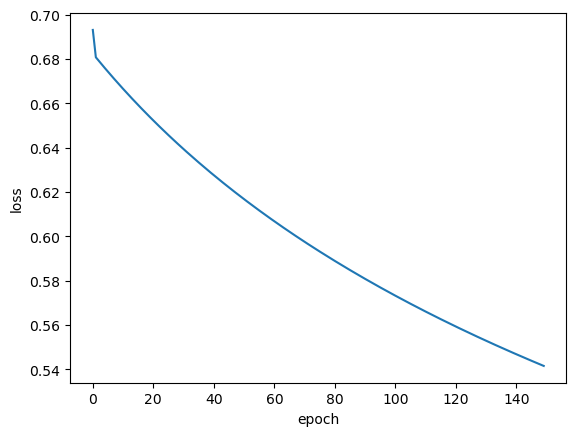

In [33]:
### THIS IS CELL 1 of 2 THAT YOU WILL EDIT FOR PART-1 AS INSTRUCTED BELOW

# initializae hyperparameters num_epochs, alpha
num_epochs = 150
print("num_epochs:", num_epochs)

### Step 1.1: 
# You will  execute this cell three times - each time with a different value of alpha below.
# For each run, note the following:
#  - num_epochs,
#  - alpha, 
#  - Final Loss at end of Training, 
#  - Training Set Accuracy,
#  - Nature of Loss vs Epoch curve
# Then, answer the questions in the next cell for each scenario run (Steps 1.2, 1.3 and 1.4).
#alpha = 2.5e-5 # Scenario 1
alpha = 2.5e-6 # Scenario 2
# alpha = 2.5e-7 # Scenario 3
print("alpha:", alpha)

# initialize model parameters w and b
w = np.zeros((n,1))
b = 0

# this list will collect loss for each epoch
costs = []

# repeat for num_epochs
for i in range(num_epochs):
        
    # forward pass (calculate current loss)
    z = X@w + b
    yhat = scipy.special.expit(z)
    J = metrics.log_loss (y, yhat, labels=[0,1])
    
    # backward propagation (calculate current gradient)
    dJ_dw = (1/m)*X.T@(yhat - y)
    dJ_db = (1/m)*np.sum((yhat-y),axis=0,keepdims=True)
    
    # gradient descent step (update parameters)
    w = w - alpha*dJ_dw
    b = b - alpha*dJ_db
    
    # append loss to costs
    costs.append(J)

print("Final Loss at end of Training:", round(J, 2))

# use final parameters w and b to calculate accuracy for training data X, y
z = X @ w + b
yhat = scipy.special.expit(z)
yhat = np.round(yhat) 
score = metrics.accuracy_score(y, yhat)
print("Training Set Accuracy:", round(score, 2))

# plot costs against iterations
plt.plot(costs)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

num_epochs: 150
alpha: 2.5e-07
Final Loss at end of Training: 0.66
Training Set Accuracy: 0.37


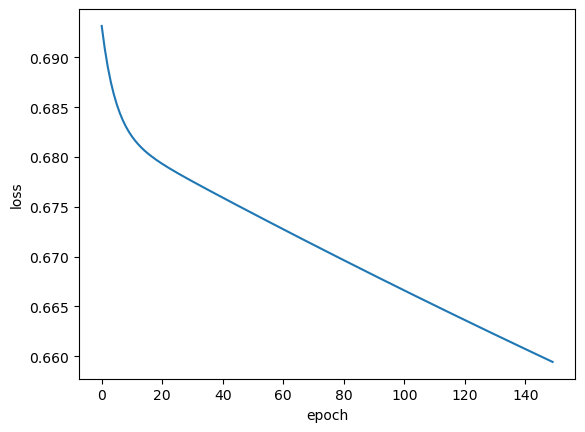

In [34]:
### THIS IS CELL 1 of 2 THAT YOU WILL EDIT FOR PART-1 AS INSTRUCTED BELOW

# initializae hyperparameters num_epochs, alpha
num_epochs = 150
print("num_epochs:", num_epochs)

### Step 1.1: 
# You will  execute this cell three times - each time with a different value of alpha below.
# For each run, note the following:
#  - num_epochs,
#  - alpha, 
#  - Final Loss at end of Training, 
#  - Training Set Accuracy,
#  - Nature of Loss vs Epoch curve
# Then, answer the questions in the next cell for each scenario run (Steps 1.2, 1.3 and 1.4).
#alpha = 2.5e-5 # Scenario 1
# alpha = 2.5e-6 # Scenario 2
alpha = 2.5e-7 # Scenario 3
print("alpha:", alpha)

# initialize model parameters w and b
w = np.zeros((n,1))
b = 0

# this list will collect loss for each epoch
costs = []

# repeat for num_epochs
for i in range(num_epochs):
        
    # forward pass (calculate current loss)
    z = X@w + b
    yhat = scipy.special.expit(z)
    J = metrics.log_loss (y, yhat, labels=[0,1])
    
    # backward propagation (calculate current gradient)
    dJ_dw = (1/m)*X.T@(yhat - y)
    dJ_db = (1/m)*np.sum((yhat-y),axis=0,keepdims=True)
    
    # gradient descent step (update parameters)
    w = w - alpha*dJ_dw
    b = b - alpha*dJ_db
    
    # append loss to costs
    costs.append(J)

print("Final Loss at end of Training:", round(J, 2))

# use final parameters w and b to calculate accuracy for training data X, y
z = X @ w + b
yhat = scipy.special.expit(z)
yhat = np.round(yhat) 
score = metrics.accuracy_score(y, yhat)
print("Training Set Accuracy:", round(score, 2))

# plot costs against iterations
plt.plot(costs)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

num_epochs: 900
alpha: 2.5e-07
Final Loss at end of Training: 0.58
Training Set Accuracy: 0.9


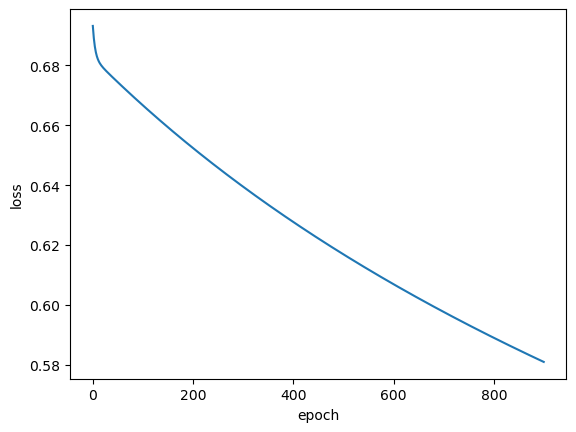

In [35]:
### THIS IS CELL 1 of 2 THAT YOU WILL EDIT FOR PART-1 AS INSTRUCTED BELOW

# initializae hyperparameters num_epochs, alpha
num_epochs = 900
print("num_epochs:", num_epochs)

### Step 1.1: 
# You will  execute this cell three times - each time with a different value of alpha below.
# For each run, note the following:
#  - num_epochs,
#  - alpha, 
#  - Final Loss at end of Training, 
#  - Training Set Accuracy,
#  - Nature of Loss vs Epoch curve
# Then, answer the questions in the next cell for each scenario run (Steps 1.2, 1.3 and 1.4).
alpha = 2.5e-7 # Scenario 1
# alpha = 2.5e-6 # Scenario 2
# alpha = 2.5e-5 # Scenario 3
print("alpha:", alpha)

# initialize model parameters w and b
w = np.zeros((n,1))
b = 0

# this list will collect loss for each epoch
costs = []

# repeat for num_epochs
for i in range(num_epochs):
        
    # forward pass (calculate current loss)
    z = X@w + b
    yhat = scipy.special.expit(z)
    J = metrics.log_loss (y, yhat, labels=[0,1])
    
    # backward propagation (calculate current gradient)
    dJ_dw = (1/m)*X.T@(yhat - y)
    dJ_db = (1/m)*np.sum((yhat-y),axis=0,keepdims=True)
    
    # gradient descent step (update parameters)
    w = w - alpha*dJ_dw
    b = b - alpha*dJ_db
    
    # append loss to costs
    costs.append(J)

print("Final Loss at end of Training:", round(J, 2))

# use final parameters w and b to calculate accuracy for training data X, y
z = X @ w + b
yhat = scipy.special.expit(z)
yhat = np.round(yhat) 
score = metrics.accuracy_score(y, yhat)
print("Training Set Accuracy:", round(score, 2))

# plot costs against iterations
plt.plot(costs)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [50]:
### THIS IS CELL 2 of 2 THAT YOU WILL EDIT FOR PART-1 AS INSTRUCTED BELOW

### Step 1.2: for each scenario that you ran in Step 1.1, note the following:
# Scenario 1:
#  - num epochs: 150
#  - alpha: 2.5e-05
#  - Final Loss at end of Training: 0.79
#  - Training Set Accuracy: 0.66 
#  - Nature of Loss vs Epoch curve, and what might explain the behavior: The loss against epoch graph indicates convergence, yet the concluding loss remains high and the accuracy is less than in Scenario 2. This might result from the greater learning rate (alpha) leading to fluctuations or excessive adjustments in the optimization process. 
# Scenario 2:
#  - num epochs: 150
#  - alpha: 2.5e-06
#  - Final Loss at end of Training: 0.54
#  - Training Set Accuracy: 0.9
#  - Nature of Loss vs Epoch curve and what might explain the behavior: The loss versus epoch graph demonstrates quicker convergence relative to Scenario 1, with a reduced end loss and improved accuracy. This is probably because the increased learning rate (alpha) permits more rapid adjustments to the model parameters.
# Scenario 3:
#  - num epochs: 150
#  - alpha: 2.5e-07
#  - Final Loss at end of Training:  0.66 
#  - Training Set Accuracy: 0.37
#  - Nature of Loss vs Epoch curve and what might explain the behavior: The loss versus epoch graph exhibits a slow rate of improvement, ending with a high loss and reduced accuracy. This might stem from a low learning rate (alpha), resulting in tardy updates to the model's parameters.

### Step 1.3: based on your observations in Step 1.2, describe which alpha you believe is optimal 
#             under the circumstances and why: In this instance, Scenario 2, having an alpha of 2.5e-6, seems to offer an optimal compromise between the rate of convergence and precision, securing a reduced ultimate loss and superior accuracy on the training set in comparison to alternative scenarios.

### Step 1.4: for Scenario 1 above, what should num_epochs be to get better accuracy (say 0.9): 900 epochs works. 


### PART 2

* In this part, you will code up the get_minibatch_indices function (Steps 2.1, 2.2, and 2.3),  code up the mini_batch logic for Logistic Regression (Steps 2.5, 2.6, and 2.7), run the code with different mini-batch sizes (Step 2.4), and explain what you see (Steps 2.8 and 2.9).

* We aren't going to preprocess data or split into train/test since the focus here is purely on the gradient descent algorithm

* NOTE: YOU WILL ONLY EDIT 3 CELLS FOR PART-2 (SEE BELOW)

In [15]:
### DO NOT EDIT THIS CELL!!!

# read the breast cancer dataset from sklearn
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

# feature matrix X: mxn
X = dataset.data
print ("X: ", X.shape)

# target vector y: mx1
y = dataset.target
y = y.reshape(y.shape[0], 1)
print ("y: ", y.shape)

# number of samples: m
m = X.shape[0]
print ("m: ", m)

# number of features: n
n = X.shape[1]
features = dataset.feature_names
print ("n: ",n)
print ("features: ", features)

X:  (569, 30)
y:  (569, 1)
m:  569
n:  30
features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [37]:
### THIS IS CELL 1 of 3 THAT YOU WILL EDIT FOR PART-2 AS INSTRUCTED BELOW

# create a function that shuffles the sample indices and returns indices of mini-batches.
# make sure you pick up any leftover sample indices in a partial mini-batch.
# so for instance, let's say m=17.
# the sample indices are therefore [0, 1, 2,... 16].
# randomly shuffling these, might give me: [1, 6, 8, 9, 13, 4, 2, 14, 10, 7, 16, 11, 3, 0, 5, 15, 12].
# now, if I use batch_size of 2, I would end up with 17//2=8 full mini-batches and 17%2=1 partial mini-batch:
#       [[1, 6], [8, 9], [13, 4], [2, 14], [10, 7], [16, 11], [3, 0], [5, 15], [12]]
# once you've coded up the function, you can test it as indicated in the next cell.
def get_minibatch_indices(m, batch_size):

    # initialize batch_indices
    batch_indices = []
    
    # Step 2.1: use np.random.permutation to shuffle sample indices
    # your code here: 
    shuffled_indices = np.random.permutation(m)
    
    
    # Step 2.2: create and append the "full" mini-batche indices into batch_indices
    # your code here:
    for i in range(m // batch_size):
        full_batch = shuffled_indices[i * batch_size: (i + 1) * batch_size]
        batch_indices.append(full_batch.tolist())

    # Step 2.3: create and append "partial" mini-batch indices (if any) into batch_indices
    # your code here:
    if m % batch_size != 0:
        partial_batch = shuffled_indices[(m // batch_size) * batch_size: ]
        batch_indices.append(partial_batch.tolist())
    
    # return the batch_indices
    return batch_indices

In [38]:
### DO NOT EDIT THIS CELL!!!

# run this cell once after you've coded up the get_minibatch_indices function above.
# if you coded the function correctly, you should get the following answers for the these test cases:

# test case 1: output should match this: 
#              [[1, 6], [8, 9], [13, 4], [2, 14], [10, 7], [16, 11], [3, 0], [5, 15], [12]]
np.random.seed(0)
print ("Test Case 1 output: ", get_minibatch_indices(17, 2))

# test case 2: output should match this:
#              [[1, 6, 8], [9, 13, 4], [2, 14, 10], [7, 16, 11], [3, 0, 5], [15, 12]]
np.random.seed(0)
print ("Test Case 2 output: ", get_minibatch_indices(17, 3))

Test Case 1 output:  [[1, 6], [8, 9], [13, 4], [2, 14], [10, 7], [16, 11], [3, 0], [5, 15], [12]]
Test Case 2 output:  [[1, 6, 8], [9, 13, 4], [2, 14, 10], [7, 16, 11], [3, 0, 5], [15, 12]]


num_epochs: 75
alpha: 2.5e-06
batch_size: 1
Final Average Loss at end of Training: 0.49
Training Set Accuracy: 0.91


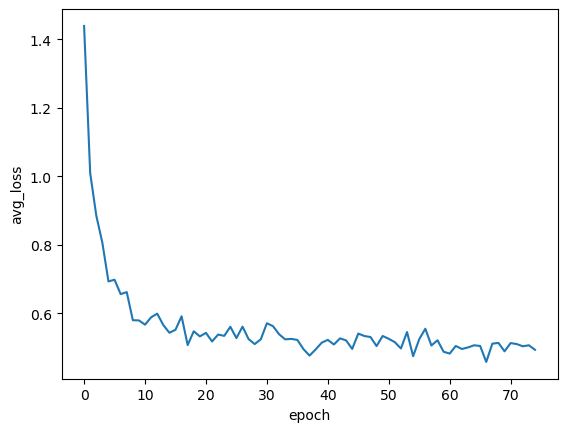

In [43]:
### THIS IS CELL 2 of 3 THAT YOU WILL EDIT FOR PART-2 AS INSTRUCTED BELOW

# reset seed to ensure true randomness
np.random.seed()

# initializae hyperparameters num_epochs, alpha, and batch size
num_epochs = 75
alpha = 2.5e-6
print("num_epochs:", num_epochs)
print("alpha:", alpha)

### Step 2.4: 
# Once you've coded up cells 2.5, 2.6, 2.7 below, you will execute this cell three times -
# each time with a different value of batch_size below.
# For each run, note the following:
#  - num_epochs,
#  - alpha,
#  - batch_size, 
#  - Final Loss at end of Training, 
#  - Training Set Accuracy,
#  - Nature of Loss vs Epoch curve
# Then, answer the questions in the next cell for each scenario run (Steps 2.8 and 2.9).
batch_size = 1 # Scenario 1
# batch_size = 128 # Scenario 2
# batch_size = m # Scenario 3
print("batch_size:", batch_size)

# initialize model parameters w and b
w = np.zeros((n,1))
b = 0

# this list will collect avg_loss for each epoch
costs = []

# repeat for num_epochs
for i in range(num_epochs):
    
    # initialize avg_loss for this epoch
    avg_loss = 0
    
    # get minibatch indices
    minibatch_indices = get_minibatch_indices(m, batch_size)
    
    # minibatch training
    for indices in minibatch_indices:
        
        # select minibatch 
        X_batch = X[indices]
        y_batch = y[indices]
        
        # Step 2.5: forward pass (calculate current loss)
        # [hint: your code will look similar to the forward pass code in Part 1, 
        #        but you'll need to update it to use only the mini batch]
        # your code here:
        z = X_batch @ w + b
        yhat = scipy.special.expit(z)
        J = metrics.log_loss(y_batch, yhat, labels=[0,1])
        
        # add this mini_batch's loss to avg_loss 
        avg_loss += J
        
        # add this mini_batch's loss to avg_loss 
        avg_loss = avg_loss + J
    
        # Step 2.6: backward propagation (calculate current gradient)
        # [hint: your code will look similar to the backward propagation code in Part 1, 
        #        but you'll need to update it to use only the mini batch]
        # your code here:
        dJ_dw = (1/len(indices)) * X_batch.T @ (yhat - y_batch)
        dJ_db = (1/len(indices)) * np.sum((yhat - y_batch), axis=0, keepdims=True)
    
    
        # Step 2.7: gradient descent step (update parameters)
        # [hint: your code will look similar to the gradient descent step code in Part 1, 
        #        but you'll need to update it to use only the mini batch]
        # your code here:
        w -= alpha * dJ_dw
        b -= alpha * dJ_db
    
    # calculate avg_loss for this epoch and append to costs
    avg_loss = avg_loss/len(minibatch_indices)
    costs.append(avg_loss)

print("Final Average Loss at end of Training:", round(avg_loss, 2))

# use final parameters w and b to calculate accuracy for training data X, y
z = X @ w + b
yhat = scipy.special.expit(z)
yhat = np.round(yhat) 
score = metrics.accuracy_score(y, yhat)
print("Training Set Accuracy:", round(score, 2))

# plot costs against iterations
plt.plot(costs)
plt.ylabel('avg_loss')
plt.xlabel('epoch')
plt.show()

num_epochs: 75
alpha: 2.5e-06
batch_size: 128
Final Average Loss at end of Training: 0.92
Training Set Accuracy: 0.86


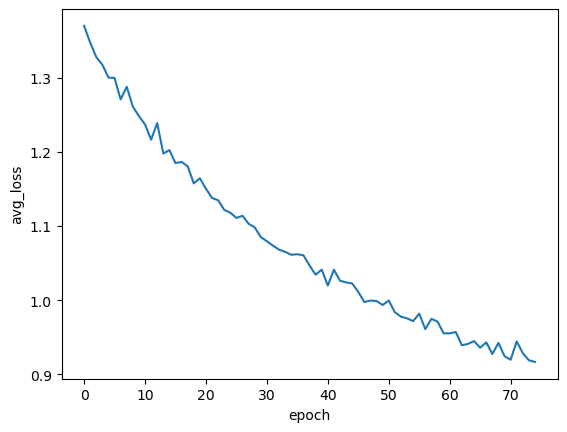

In [44]:
### THIS IS CELL 2 of 3 THAT YOU WILL EDIT FOR PART-2 AS INSTRUCTED BELOW

# reset seed to ensure true randomness
np.random.seed()

# initializae hyperparameters num_epochs, alpha, and batch size
num_epochs = 75
alpha = 2.5e-6
print("num_epochs:", num_epochs)
print("alpha:", alpha)

### Step 2.4: 
# Once you've coded up cells 2.5, 2.6, 2.7 below, you will execute this cell three times -
# each time with a different value of batch_size below.
# For each run, note the following:
#  - num_epochs,
#  - alpha,
#  - batch_size, 
#  - Final Loss at end of Training, 
#  - Training Set Accuracy,
#  - Nature of Loss vs Epoch curve
# Then, answer the questions in the next cell for each scenario run (Steps 2.8 and 2.9).
# batch_size = 1 # Scenario 1
batch_size = 128 # Scenario 2
# batch_size = m # Scenario 3
print("batch_size:", batch_size)

# initialize model parameters w and b
w = np.zeros((n,1))
b = 0

# this list will collect avg_loss for each epoch
costs = []

# repeat for num_epochs
for i in range(num_epochs):
    
    # initialize avg_loss for this epoch
    avg_loss = 0
    
    # get minibatch indices
    minibatch_indices = get_minibatch_indices(m, batch_size)
    
    # minibatch training
    for indices in minibatch_indices:
        
        # select minibatch 
        X_batch = X[indices]
        y_batch = y[indices]
        
        # Step 2.5: forward pass (calculate current loss)
        # [hint: your code will look similar to the forward pass code in Part 1, 
        #        but you'll need to update it to use only the mini batch]
        # your code here:
        z = X_batch @ w + b
        yhat = scipy.special.expit(z)
        J = metrics.log_loss(y_batch, yhat, labels=[0,1])
        
        # add this mini_batch's loss to avg_loss 
        avg_loss += J
        
        # add this mini_batch's loss to avg_loss 
        avg_loss = avg_loss + J
    
        # Step 2.6: backward propagation (calculate current gradient)
        # [hint: your code will look similar to the backward propagation code in Part 1, 
        #        but you'll need to update it to use only the mini batch]
        # your code here:
        dJ_dw = (1/len(indices)) * X_batch.T @ (yhat - y_batch)
        dJ_db = (1/len(indices)) * np.sum((yhat - y_batch), axis=0, keepdims=True)
    
    
        # Step 2.7: gradient descent step (update parameters)
        # [hint: your code will look similar to the gradient descent step code in Part 1, 
        #        but you'll need to update it to use only the mini batch]
        # your code here:
        w -= alpha * dJ_dw
        b -= alpha * dJ_db
    
    # calculate avg_loss for this epoch and append to costs
    avg_loss = avg_loss/len(minibatch_indices)
    costs.append(avg_loss)

print("Final Average Loss at end of Training:", round(avg_loss, 2))

# use final parameters w and b to calculate accuracy for training data X, y
z = X @ w + b
yhat = scipy.special.expit(z)
yhat = np.round(yhat) 
score = metrics.accuracy_score(y, yhat)
print("Training Set Accuracy:", round(score, 2))

# plot costs against iterations
plt.plot(costs)
plt.ylabel('avg_loss')
plt.xlabel('epoch')
plt.show()

num_epochs: 75
alpha: 2.5e-06
batch_size: 569
Final Average Loss at end of Training: 1.19
Training Set Accuracy: 0.88


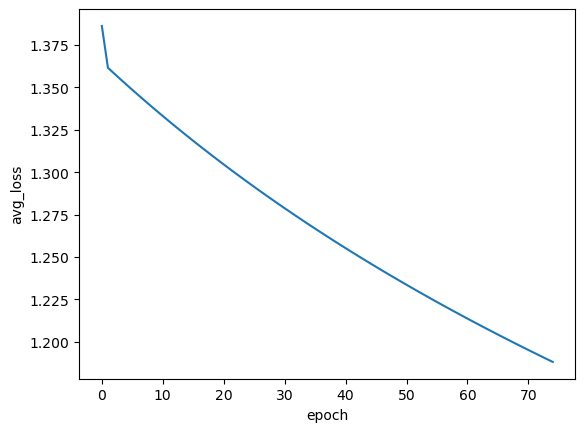

In [45]:
### THIS IS CELL 2 of 3 THAT YOU WILL EDIT FOR PART-2 AS INSTRUCTED BELOW

# reset seed to ensure true randomness
np.random.seed()

# initializae hyperparameters num_epochs, alpha, and batch size
num_epochs = 75
alpha = 2.5e-6
print("num_epochs:", num_epochs)
print("alpha:", alpha)

### Step 2.4: 
# Once you've coded up cells 2.5, 2.6, 2.7 below, you will execute this cell three times -
# each time with a different value of batch_size below.
# For each run, note the following:
#  - num_epochs,
#  - alpha,
#  - batch_size, 
#  - Final Loss at end of Training, 
#  - Training Set Accuracy,
#  - Nature of Loss vs Epoch curve
# Then, answer the questions in the next cell for each scenario run (Steps 2.8 and 2.9).
#batch_size = 1 # Scenario 1
# batch_size = 128 # Scenario 2
batch_size = m # Scenario 3
print("batch_size:", batch_size)

# initialize model parameters w and b
w = np.zeros((n,1))
b = 0

# this list will collect avg_loss for each epoch
costs = []

# repeat for num_epochs
for i in range(num_epochs):
    
    # initialize avg_loss for this epoch
    avg_loss = 0
    
    # get minibatch indices
    minibatch_indices = get_minibatch_indices(m, batch_size)
    
    # minibatch training
    for indices in minibatch_indices:
        
        # select minibatch 
        X_batch = X[indices]
        y_batch = y[indices]
        
        # Step 2.5: forward pass (calculate current loss)
        # [hint: your code will look similar to the forward pass code in Part 1, 
        #        but you'll need to update it to use only the mini batch]
        # your code here:
        z = X_batch @ w + b
        yhat = scipy.special.expit(z)
        J = metrics.log_loss(y_batch, yhat, labels=[0,1])
        
        # add this mini_batch's loss to avg_loss 
        avg_loss += J
        
        # add this mini_batch's loss to avg_loss 
        avg_loss = avg_loss + J
    
        # Step 2.6: backward propagation (calculate current gradient)
        # [hint: your code will look similar to the backward propagation code in Part 1, 
        #        but you'll need to update it to use only the mini batch]
        # your code here:
        dJ_dw = (1/len(indices)) * X_batch.T @ (yhat - y_batch)
        dJ_db = (1/len(indices)) * np.sum((yhat - y_batch), axis=0, keepdims=True)
    
    
        # Step 2.7: gradient descent step (update parameters)
        # [hint: your code will look similar to the gradient descent step code in Part 1, 
        #        but you'll need to update it to use only the mini batch]
        # your code here:
        w -= alpha * dJ_dw
        b -= alpha * dJ_db
    
    # calculate avg_loss for this epoch and append to costs
    avg_loss = avg_loss/len(minibatch_indices)
    costs.append(avg_loss)

print("Final Average Loss at end of Training:", round(avg_loss, 2))

# use final parameters w and b to calculate accuracy for training data X, y
z = X @ w + b
yhat = scipy.special.expit(z)
yhat = np.round(yhat) 
score = metrics.accuracy_score(y, yhat)
print("Training Set Accuracy:", round(score, 2))

# plot costs against iterations
plt.plot(costs)
plt.ylabel('avg_loss')
plt.xlabel('epoch')
plt.show()

num_epochs: 150
alpha: 2.5e-06
batch_size: 569
Final Average Loss at end of Training: 0.54
Training Set Accuracy: 0.9


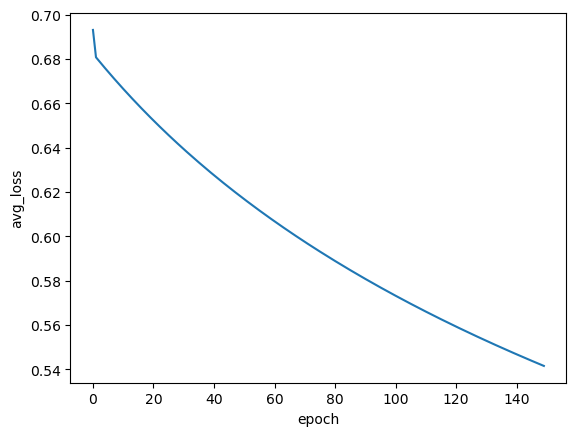

In [47]:
### THIS IS CELL 2 of 3 THAT YOU WILL EDIT FOR PART-2 AS INSTRUCTED BELOW

# reset seed to ensure true randomness
np.random.seed()

# initializae hyperparameters num_epochs, alpha, and batch size
num_epochs = 150
alpha = 2.5e-6
print("num_epochs:", num_epochs)
print("alpha:", alpha)

### Step 2.4: 
# Once you've coded up cells 2.5, 2.6, 2.7 below, you will execute this cell three times -
# each time with a different value of batch_size below.
# For each run, note the following:
#  - num_epochs,
#  - alpha,
#  - batch_size, 
#  - Final Loss at end of Training, 
#  - Training Set Accuracy,
#  - Nature of Loss vs Epoch curve
# Then, answer the questions in the next cell for each scenario run (Steps 2.8 and 2.9).
#batch_size = 1 # Scenario 1
#batch_size = 128 # Scenario 2
batch_size = m # Scenario 3
print("batch_size:", batch_size)

# initialize model parameters w and b
w = np.zeros((n,1))
b = 0

# this list will collect avg_loss for each epoch
costs = []

# repeat for num_epochs
for i in range(num_epochs):
    
    # initialize avg_loss for this epoch
    avg_loss = 0
    
    # get minibatch indices
    minibatch_indices = get_minibatch_indices(m, batch_size)
    
    # minibatch training
    for indices in minibatch_indices:
        
        # select minibatch 
        X_batch = X[indices]
        y_batch = y[indices]
        
        # Step 2.5: forward pass (calculate current loss)
        z = X_batch @ w + b
        yhat = scipy.special.expit(z)
        J = metrics.log_loss(y_batch, yhat, labels=[0,1])
        
        # add this mini_batch's loss to avg_loss 
        avg_loss += J
    
        # Step 2.6: backward propagation (calculate current gradient)
        dJ_dw = (1/len(indices)) * X_batch.T @ (yhat - y_batch)
        dJ_db = (1/len(indices)) * np.sum((yhat - y_batch), axis=0, keepdims=True)
    
        # Step 2.7: gradient descent step (update parameters)
        w -= alpha * dJ_dw #weights
        b -= alpha * dJ_db #bias 
    
    # calculate avg_loss for this epoch and append to costs
    avg_loss /= len(minibatch_indices)
    costs.append(avg_loss)

print("Final Average Loss at end of Training:", round(avg_loss, 2))

# use final parameters w and b to calculate accuracy for training data X, y
z = X @ w + b
yhat = scipy.special.expit(z)
yhat = np.round(yhat) 
score = metrics.accuracy_score(y, yhat)
print("Training Set Accuracy:", round(score, 2))

# plot costs against iterations
plt.plot(costs)
plt.ylabel('avg_loss')
plt.xlabel('epoch')
plt.show()


In [48]:
### THIS IS CELL 3 of 3 THAT YOU WILL EDIT FOR PART-2 AS INSTRUCTED BELOW

### Step 2.8: for each scenario that you ran in Step 2.4, note the following:
# Scenario 1:
#  - num epochs: 75
#  - alpha: 2.5e-06
#  - batch_size: 1
#  - Final Average Loss at end of Training: 0.49
#  - Training Set Accuracy: 0.91
#  - Nature of Loss vs Epoch curve, and what might explain the behavior: The curve's rapid initial drop indicates quick learning from each training example, typical of stochastic gradient descent. The fluctuations that follow reflect the variance in the data, as single examples might not accurately represent the overall trend. The curve's plateau suggests the model is nearing an optimal state, where additional learning has minimal impact on weights. The training concludes with an impressive average loss of 0.49 and accuracy of 0.91, indicating a good fit to the training data. However, caution against overfitting is advised, given the nature of stochastic gradient descent to closely adapt to training data.
# Scenario 2:
#  - num epochs: 75
#  - alpha: 2.5e-06
#  - batch_size: 128
#  - Final Average Loss at end of Training: 0.92
#  - Training Set Accuracy: 0.86
#  - Nature of Loss vs Epoch curve, and what might explain the behavior: The convergence of the loss curve is smoother than in Scenario 1, thanks to the increased batch size, which leads to steadier updates.
# Scenario 3:
#  - num epochs: 75
#  - alpha: 2.5e-06
#  - batch_size: 569
#  - Final Average Loss at end of Training: 1.19
#  - Training Set Accuracy: 0.88
#  - Nature of Loss vs Epoch curve, and what might explain the behavior: The loss curve's slow convergence is attributed to using the whole dataset as a single batch, resulting in slower parameter updates and delayed convergence. This comprehensive approach ensures thorough learning but at the expense of speed.

### Step 2.9: for Scenario 3 above, what should num_epochs be to get better accuracy (say 0.90): If we double it and make it 150 epoches works 
